# Demo of the qwgraph package
This file is a demonstration for the qwgraph python package.
The package aim is to provide an efficient implementation of the quantum walk based search on arbitrary graphs described in https://arxiv.org/abs/2310.10451

This file is cut into three parts: 
1. Introduction to the class QWSearch
2. Searching an edge in the complete graph
3. Searching several nodes in a 2D grid

In [4]:
##############################################
##                  Imports                 ##
##############################################
# Maths
import numpy as np
import math 
from math import pi 
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
# Graph
import networkx as nx 
# Utilities
import copy
from tqdm.notebook import tqdm
import pandas as pd
# Plot configuration
sns.set()
sns.set_context("poster")
sns.set_style("ticks")

# Import the package
from qwgraph import QWSearch,coins,PipeLine,AddressingType
import qwgraph

## 1. Introduction to the class QWSearch
### 1.1 Initializing a QWSearch object and modifying it

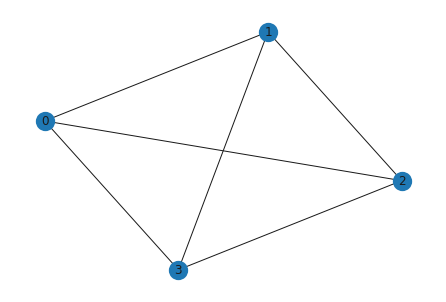

In [5]:
# The bipartite graph is created via networkx
G = nx.complete_graph(4)
nx.draw(G,with_labels=True)

In [6]:
# We create the associated QW
qw = QWSearch(G)

# The initial state of the QW is diagonal by default
qw.state(qw.edges())

{(0, 1): array([0.28867513+0.j, 0.28867513+0.j]),
 (0, 2): array([0.28867513+0.j, 0.28867513+0.j]),
 (0, 3): array([0.28867513+0.j, 0.28867513+0.j]),
 (1, 2): array([0.28867513+0.j, 0.28867513+0.j]),
 (1, 3): array([0.28867513+0.j, 0.28867513+0.j]),
 (2, 3): array([0.28867513+0.j, 0.28867513+0.j])}

In [7]:
# The state of the QW can be modified using a dictionnary
state = dict()
for edge in qw.edges():
    state[edge] = [2,1j]
qw.set_state(state)

# The new state will automatically be normalized
qw.state(qw.edges())

{(0, 1): array([0.36514837+0.j        , 0.        +0.18257419j]),
 (0, 2): array([0.36514837+0.j        , 0.        +0.18257419j]),
 (0, 3): array([0.36514837+0.j        , 0.        +0.18257419j]),
 (1, 2): array([0.36514837+0.j        , 0.        +0.18257419j]),
 (1, 3): array([0.36514837+0.j        , 0.        +0.18257419j]),
 (2, 3): array([0.36514837+0.j        , 0.        +0.18257419j])}

In [8]:
# It is possible to reset the state to a diagonal one with reset
qw.reset()
qw.state(qw.edges())

{(0, 1): array([0.28867513+0.j, 0.28867513+0.j]),
 (0, 2): array([0.28867513+0.j, 0.28867513+0.j]),
 (0, 3): array([0.28867513+0.j, 0.28867513+0.j]),
 (1, 2): array([0.28867513+0.j, 0.28867513+0.j]),
 (1, 3): array([0.28867513+0.j, 0.28867513+0.j]),
 (2, 3): array([0.28867513+0.j, 0.28867513+0.j])}

In [9]:
# By entering specific edges, nodes or amplitudes, one can access those states only
print("First two edges:\n",qw.state(qw.edges()[0:1]))
print()
print("First node\n", qw.state([qw.nodes()[0]], _type=AddressingType.NODE))
print()
print("Two amplitudes\n", qw.state([(0,1), (1,0)], _type=AddressingType.AMPLITUDE))

First two edges:
 {(0, 1): array([0.28867513+0.j, 0.28867513+0.j])}

First node
 {0: array([0.28867513+0.j, 0.28867513+0.j, 0.28867513+0.j])}

Two amplitudes
 {(0, 1): array([0.28867513+0.j]), (1, 0): array([0.28867513+0.j])}


In [10]:
# Same with the label, the polarity or the proba
print("First two edges:\n",qw.label(qw.edges()[0:1]))
print()
print("First node\n", qw.label([qw.nodes()[0]], _type=AddressingType.NODE))
print()
print("Two amplitudes\n", qw.label([(0,1), (1,0)], _type=AddressingType.AMPLITUDE))

First two edges:
 {(0, 1): ['$\\psi_{0,1}^-$', '$\\psi_{0,1}^+$']}

First node
 {0: ['$\\psi_{0,1}^-$', '$\\psi_{0,2}^-$', '$\\psi_{0,3}^-$']}

Two amplitudes
 {(0, 1): ['$\\psi_{0,1}^-$'], (1, 0): ['$\\psi_{0,1}^+$']}


## 2. Example 1 : Searching an edge in the hypercube

4096 nodes and 24576 edges
Pipeline: UNITARY(Oracle on ((0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))) -> COIN -> SCATTERING -> PROBA

Hitting time: 137 Proba at hitting time: 0.8300884553657915


Text(0, 0.5, 'proba')

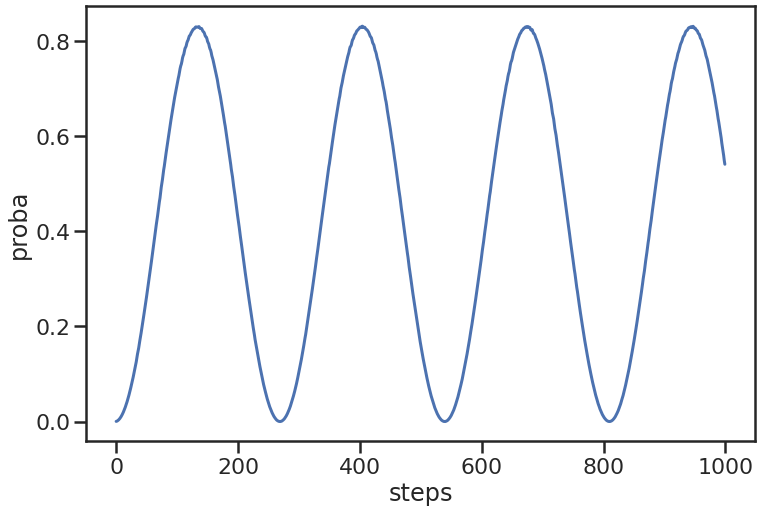

In [11]:
qw = QWSearch(nx.hypercube_graph(12))
print(f"{len(qw.nodes())} nodes and {len(qw.edges())} edges")

pipeline = qwgraph.search_edges(coins.X, "grover", [qw.edges()[0]], -coins.X)
print("Pipeline:", pipeline)

T,P = qw.get_T_P(pipeline)
print("\nHitting time:",T,"Proba at hitting time:",P)

qw.reset()

p = qw.run(pipeline,ticks=1000)

plt.figure(figsize=(12,8))
sns.lineplot(x=list(range(len(p))), y=p)
plt.xlabel("steps")
plt.ylabel("proba")

## 3. Example 2 : Searching nodes with space-time dependent coin and fourier scattering in a random scale-free graph

500 nodes and 809 edges
Searched nodes: [18, 258, 461, 314, 44]


Building the pipeline:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0, 0.5, 'proba')

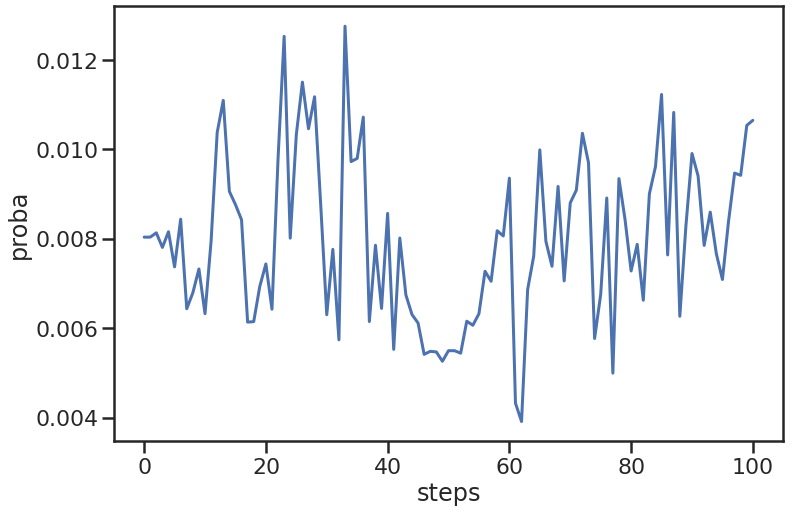

In [12]:
qw = QWSearch(nx.scale_free_graph(500)) # Random scale-free graph of 10000 nodes
N,M = len(qw.nodes()),len(qw.edges())
print(f"{N} nodes and {M} edges")

TMAX = 100 # Number of steps

searched = list(np.random.choice(qw.nodes(), 5, replace=False)) # Search 5 random nodes
print("Searched nodes:", searched)

def coin(edge, t): # coin in function of the edge and time
    (u,v) = edge
    theta = 2*pi*t/TMAX
    phi = 2*pi*qw.degree(u)/N
    lbd = 2*pi*qw.degree(v)/N
    return coins.generalized_coin(theta, phi, lbd)

def scattering(degree): #fourier operator
    w = np.exp(1j*2*pi/degree)
    S = np.array([[w**(i*j)/np.sqrt(degree) for j in range(degree)] for i in range(degree)])
    return S

pipeline = PipeLine(addressing_type=AddressingType.NODE)
pipeline.add_proba(searched, name="Initial proba", addressing_type=AddressingType.NODE)
for t in tqdm(range(TMAX), desc="Building the pipeline"): # For each step
    pipeline.add_unitary(searched, lambda d:-np.eye(d), name="Oracle") # We add a -I oracle on the marked nodes
    pipeline.add_coin({e:coin(e, t) for e in qw.edges()}) # Add the coin step
    pipeline.add_scattering_by_degree(scattering) # Add the fourier scattering
    pipeline.add_proba(searched) # Measure the proba
    

qw.reset()

p = qw.run(pipeline,ticks=1)

plt.figure(figsize=(12,8))
sns.lineplot(x=list(range(len(p))), y=p)
plt.xlabel("steps")
plt.ylabel("proba")